<a href="https://colab.research.google.com/github/ayushs0911/Projects/blob/main/Sales_Forecast_using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement
Forecast sales using store, promotion, and competitor data


## Significance of Analysis
- For companies to become competitive and skyrocket their growth, they need to leaverage AI/ML to develop predictive models to forecast sales in future 
- Predictive models attempt at forceasting future sales based on historical data while taking into account seasonality effects, demand, holidays, promotions, and competition.

## Importing Libraries and Dataset 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime 

###About the Data

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.<br>
Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.<br>
Data is sourced from [Kaggle](https://www.kaggle.com/c/rossmann-store-sales/data). 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import Sales Training Data 

In [4]:
sales_train = pd.read_csv('/content/drive/MyDrive/Datasets/rossmann-store-sales/train.csv')


<ipython-input-4-19cda71d4b9d>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train = pd.read_csv('/content/drive/MyDrive/Datasets/rossmann-store-sales/train.csv')


In [5]:
sales_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
sales_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [7]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Total 9 columns in total.<br>
8 features, each contains 1017209 data points <br>
1 Target variable. 

In [8]:
#statistical analysis of the data
sales_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Average Sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551<br>
Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388

#### Importing Store Information Data
This contains supplemental information about the stores. 

In [9]:
store_info  = pd.read_csv('/content/drive/MyDrive/Datasets/rossmann-store-sales/store.csv')

In [10]:
store_info.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


This dataframe only includes information about the unique 1115 stores that are part of this study. 

In [11]:
store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [12]:
#statistical analysis of the data
store_info.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


On average, the competition distance is 5404 metres away (5.4 km).

## Exploring Dataset

### Explore Sales Training Data 

<AxesSubplot:>

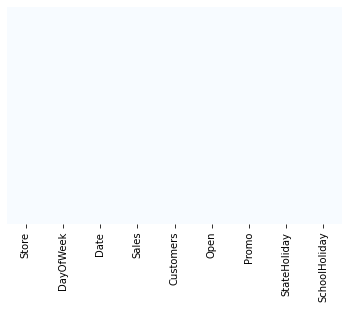

In [13]:
#checking the missing values
sns.heatmap(sales_train.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [14]:
sales_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Luckily, no data is missing. 

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

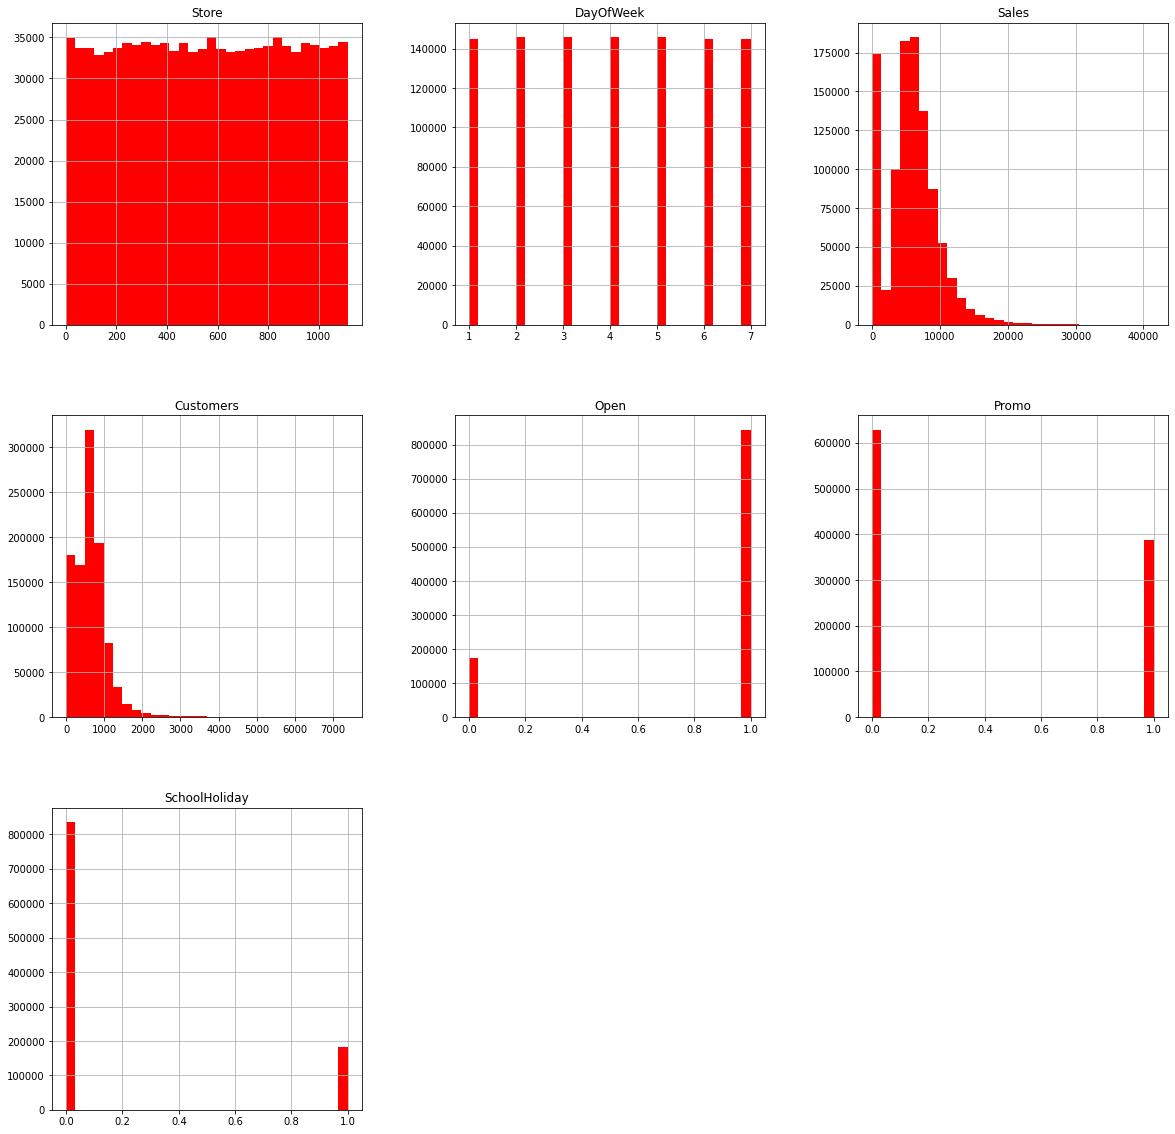

In [15]:
sales_train.hist(bins = 30, figsize = (20,20), color = 'r')


- Average 600 customers per day, maximum is 4500. 
- Data is equally distributed across various Days of the week (~150000 observations x 7 days = ~1.1 million observation)
- Stores are open ~80% of the time 
- Data is equally distributed among all stores (no bias)
- Promo#1 was running ~40% of the time. 
- Average Sales around 5000-6000 Euros 
- School Holidays are around ~18% of the time. 


In [16]:
sales_train['Customers'].max()

7388

In [17]:
#Let's see how many stores are open and closed!
closed_train = sales_train[sales_train['Open'] == 0]
open_train = sales_train[sales_train['Open'] == 1]
print("Total = ", len(sales_train))
print('Number of closed stores = ', len(closed_train))
print('Number of open stroes = ', len(open_train))

Total =  1017209
Number of closed stores =  172817
Number of open stroes =  844392


In [18]:
#omly keep open stores and remove closed stores 
sales_train = sales_train[sales_train['Open'] ==1]

#dropping the 'Open' Columns since it has no meaning now
sales_train.drop(['Open'], axis =1, inplace = True)

<ipython-input-18-c70e271f6ccb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train.drop(['Open'], axis =1, inplace = True)


In [19]:
sales_train

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [20]:
sales_train.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


#### Exploring Stores information data

<AxesSubplot:>

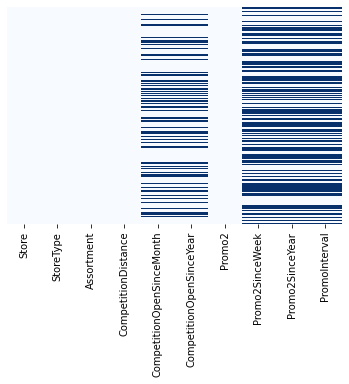

In [21]:
#checking the missing data 
sns.heatmap(store_info.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [22]:
store_info.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [23]:
#Lookung at missing values in the 'CompetitionDistance'
store_info[store_info['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [24]:
# Looking missing values in 'Competition Open Since Month'
# many rows are missing = 334 (almost one third of 1115 stores)
store_info[store_info['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [25]:
store_info[store_info['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


It seems like if 'promo2' is zero, 'promo2sinceweek', 'promo2SinceYear', and 'PromoInterval' information is set to **NaN** <br>
There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing

In [26]:
#lets set these values to zeros 
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for str in str_cols:
  store_info[str].fillna(0, inplace = True)

Now, 3 values are missing from 'CompetitionDistance'. Filling it with average values of the 'CompetitionDistance' column. 

In [27]:
store_info['CompetitionDistance'].fillna(store_info['CompetitionDistance'].mean(), inplace = True)

In [28]:
store_info.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

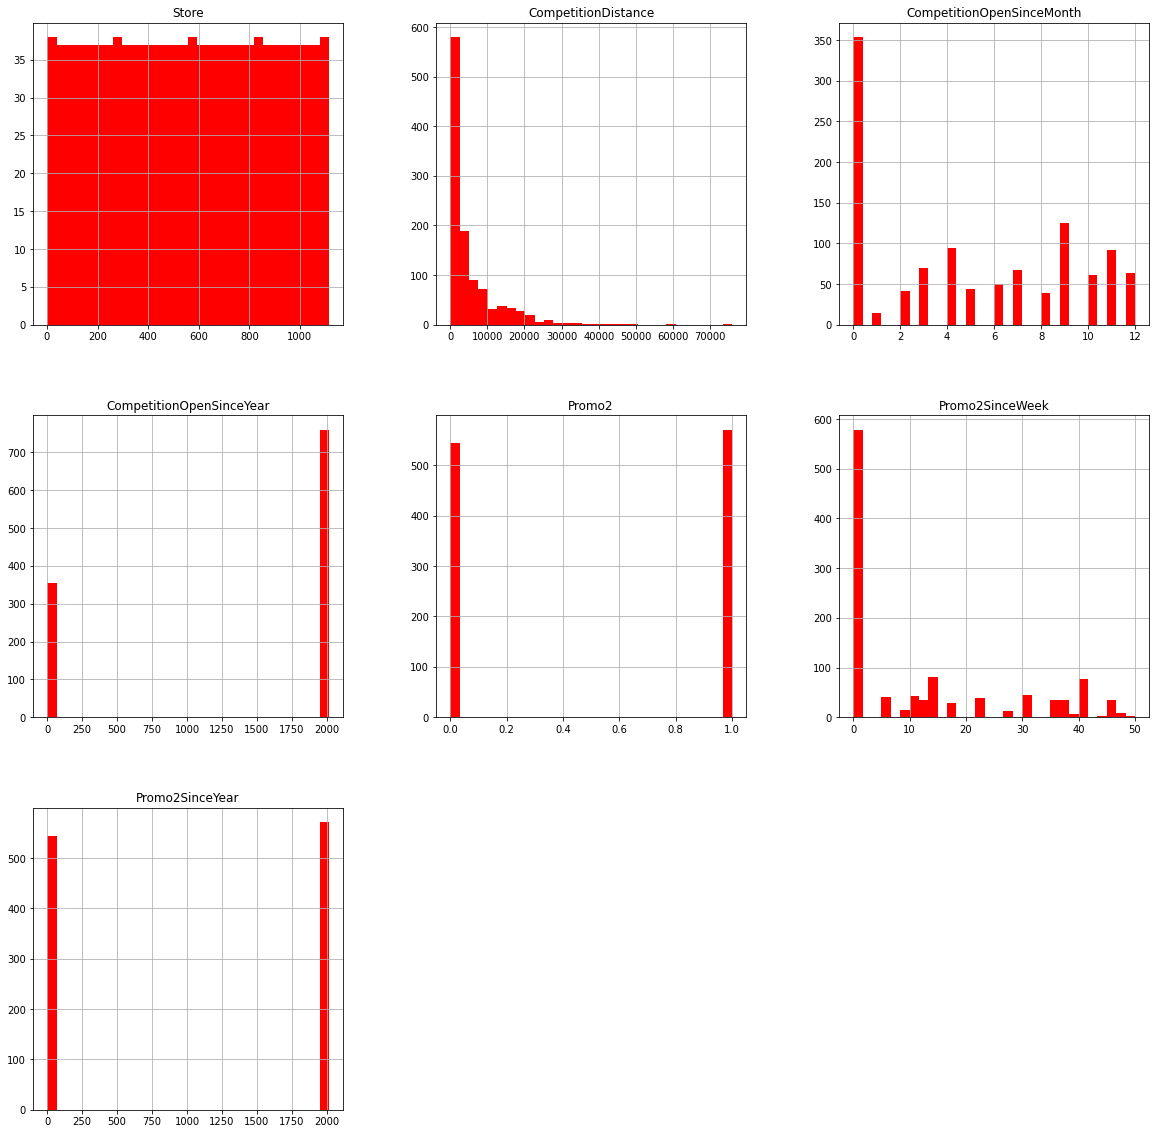

In [29]:
store_info.hist(bins = 30, figsize = (20,20), color = 'r')

- Half of the stores are involved in Promo 2 
- Half of the stores have their competition at a distance 0-3000m (3 kms away)
- Data stored equally to all the stores

## Explore Merged Dataset

#### Merging both the DataFrames together based on 'store'

In [30]:
sales_train_all = pd.merge(sales_train, store_info, how = 'inner', on = 'Store')

In [31]:
sales_train_all

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


In [32]:
correlations = sales_train_all.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

- Customers and promo are positively correlated with the sales. 
- Promo2 has no significance. 

<AxesSubplot:>

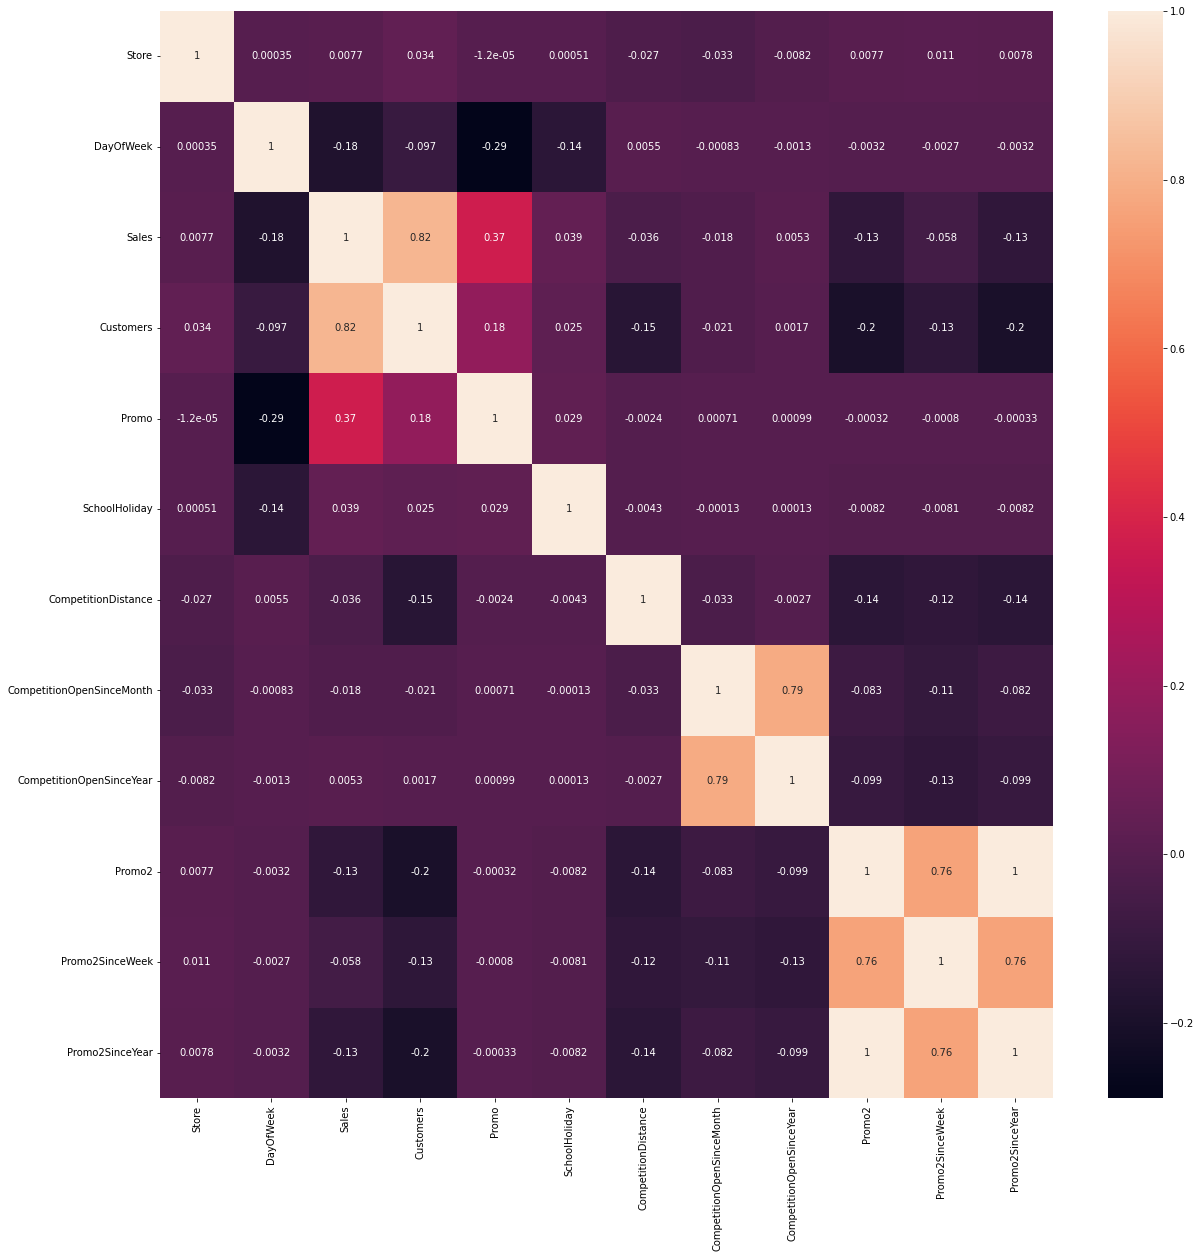

In [33]:
#let's visualise this graphically 
correlations = sales_train_all.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

In [34]:
#let's separate the year, month and day into a separate column 
sales_train_all['Year'] = pd.DatetimeIndex(sales_train_all['Date']).year
sales_train_all['Month'] = pd.DatetimeIndex(sales_train_all['Date']).month
sales_train_all['Day'] = pd.DatetimeIndex(sales_train_all['Date']).day

In [35]:
sales_train_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


#### Let's take a look at the average sales and number of customers per month 


Text(0.5, 1.0, 'Average Customer per month')

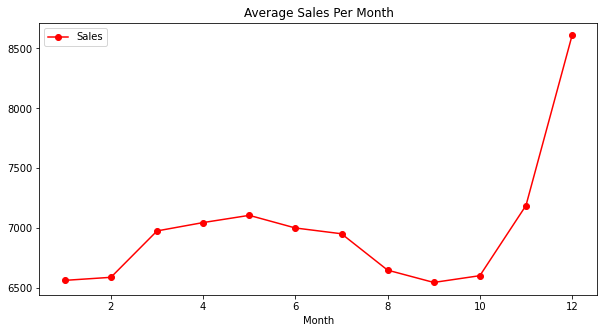

<Figure size 432x288 with 0 Axes>

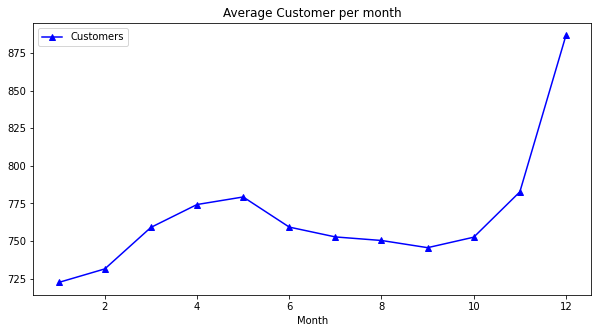

In [36]:
axis = sales_train_all.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')

plt.figure()
axis = sales_train_all.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Customer per month')

- `groupby` works great by grouping all the data that share the same month columns, then obtain the mean of the sales column. 
- It looks like sales and number of customers peak around christmas timeframe. 

#### Let's take a look at the sales and customers per day of the month

Text(0.5, 1.0, 'Average Sales Per Day')

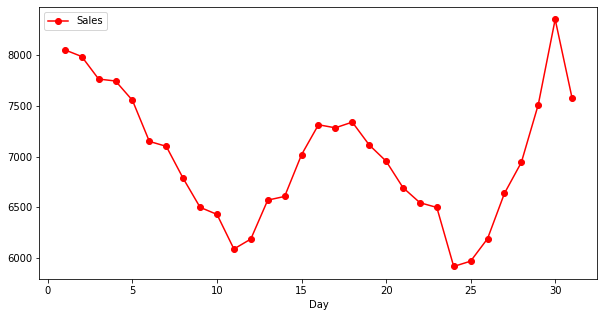

<Figure size 432x288 with 0 Axes>

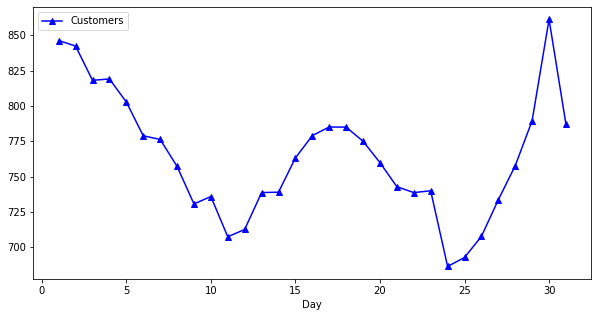

In [37]:
ax = sales_train_all.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day')

plt.figure()
ax = sales_train_all.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Sales Per Day')

- Minimum number of customers are generally around 24th of the march 
- Most customers and sales are around 30th and 1st of month. 

Text(0.5, 1.0, 'Average Customers Per Day of the Week')

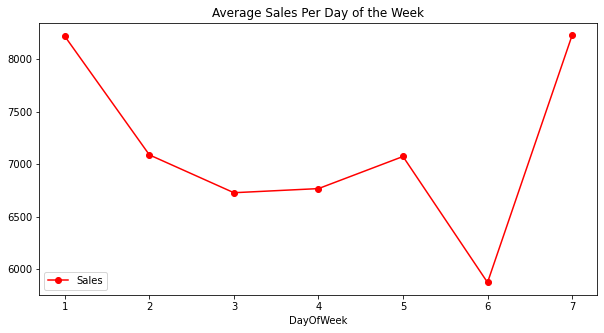

<Figure size 432x288 with 0 Axes>

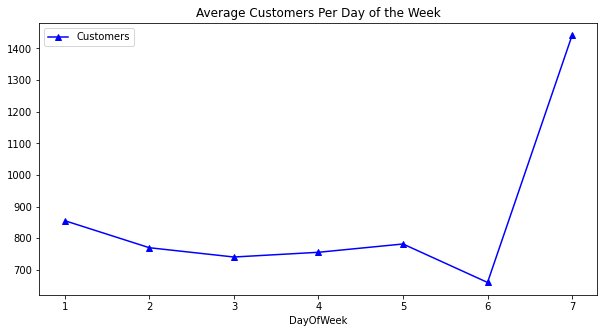

In [38]:
# Let's do the same for the day of the week   y)

axis = sales_train_all.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day of the Week')

plt.figure()
axis = sales_train_all.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Day of the Week')

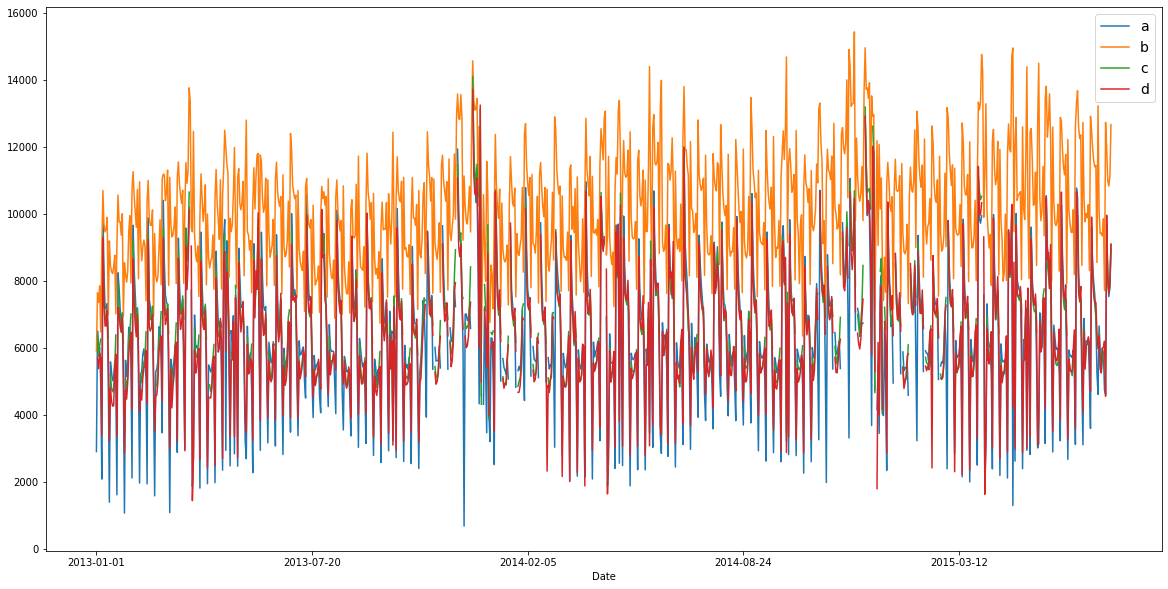

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
sales_train_all.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax=ax)
plt.legend(fontsize = 14)

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

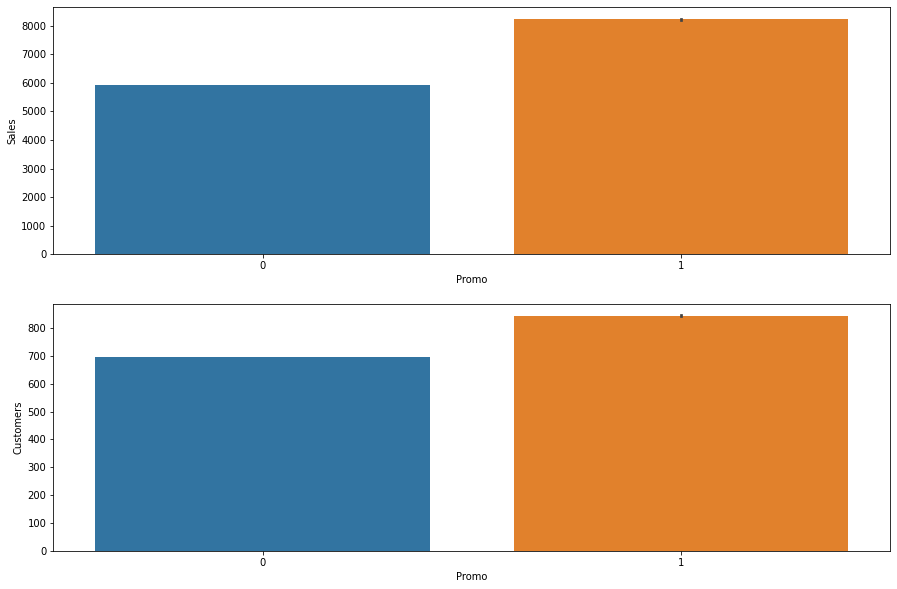

In [40]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all)

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all)

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

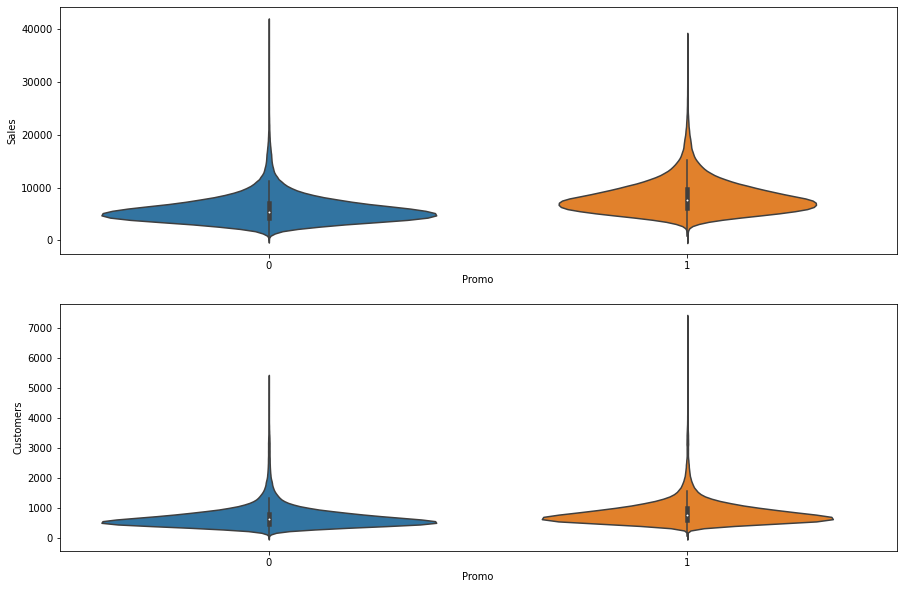

In [41]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = sales_train_all)

plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = sales_train_all)

## Understand the intuition behind Facebook Prophet 
- Prophet is open source software released by Facebook's Core Data Science team. 
- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly and daily seasonality, plus holiday effects. 
- Prophet works best with time series that have strong seasonsal effects and several seasons of histroical data. 

Prophet implements an **additive regression** model with 4 elements : 
1. A piecewise linear, Prophet automatically picks up change points in the data and identifies any change in trends 
2. A yearly seasonal component modeled using Fourier series 
3. A weekly seasonal component 
4. A holiday list that can be manually provided. 

### Train the model 

In [42]:
from prophet import Prophet 

In [43]:
def sales_prediction(Store_ID, sales_df, periods):
  """
  Function takess dataframe, storeId and number of period forecast
  it then generates date/sales columns in prophet format 
  then makes time series predictions. 
  """
  sales_df = sales_df[sales_df['Store'] == Store_ID]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date':'ds','Sales':'y'})
  sales_df = sales_df.sort_values('ds')
  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
  figure_2 = model.plot_components(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv8f0of9m/9zfp_dt0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv8f0of9m/zp9xlegn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5279', 'data', 'file=/tmp/tmpv8f0of9m/9zfp_dt0.json', 'init=/tmp/tmpv8f0of9m/zp9xlegn.json', 'output', 'file=/tmp/tmpv8f0of9m/prophet_modelohcaattf/prophet_model-20230316145636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


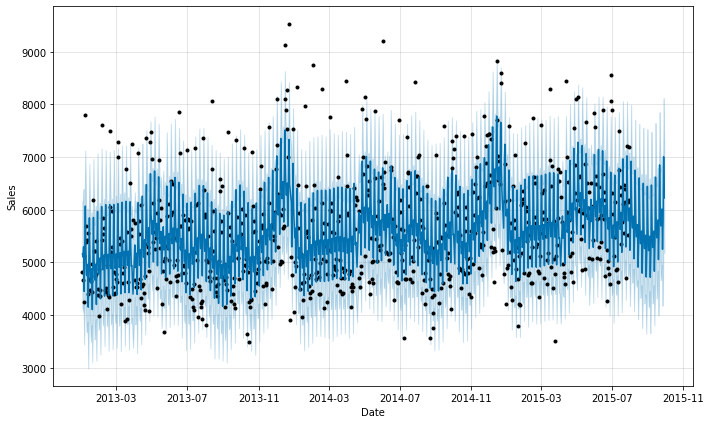

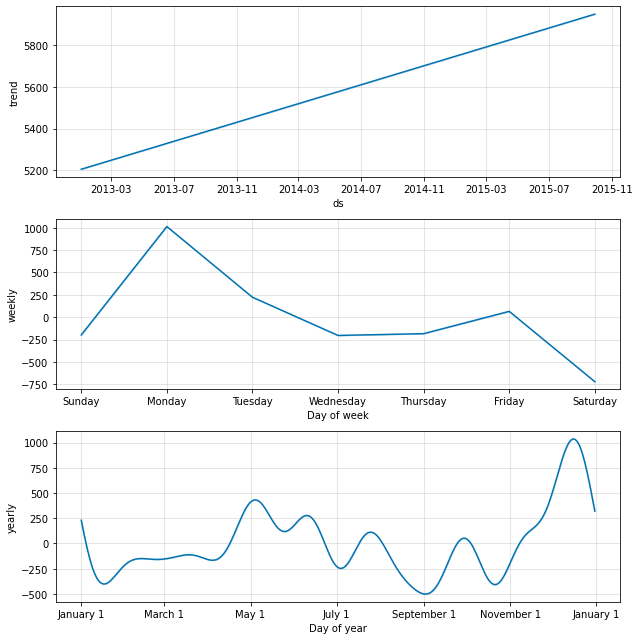

In [44]:
sales_prediction(10, sales_train_all, 60)

State Holiday : Indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. 
- a = public holiday, b = Easter Holiday, c = christmas, 0 = None. 
- SchoolHoliday : indicates if the (Store, Date) was affected by the closure of public schools. 

In [45]:
def sales_predictions(Store_ID, sales_df, holidays, periods):
  """
  function takes in Store ID and returns two data/sales columns in prophet format 
  and also formats data to fit prophet. 
  """
  sales_df = sales_df[sales_df['Store'] == Store_ID]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date':'ds','Sales':'y'})
  sales_df = sales_df.sort_values('ds')
  model = Prophet(holidays = holidays)
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
  figure_2 = model.plot_components(forecast)

In [46]:
# Get all the dates pertaining to school holidays 
school_holidays = sales_train_all[sales_train_all['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [47]:
# Get all the dates pertaining to state holidays 
state_holidays = sales_train_all [ (sales_train_all['StateHoliday'] == 'a') | (sales_train_all['StateHoliday'] == 'b') | (sales_train_all['StateHoliday'] == 'c')  ].loc[:, 'Date'].values
state_holidays.shape

(910,)

In [48]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})

In [49]:
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


In [50]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})

In [51]:
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [52]:
# concatenate both school and state holidays 
school_state_holidays = pd.concat((state_holidays, school_holidays))

In [53]:
school_state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv8f0of9m/zu97dl3i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv8f0of9m/vlhvhcs9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23794', 'data', 'file=/tmp/tmpv8f0of9m/zu97dl3i.json', 'init=/tmp/tmpv8f0of9m/vlhvhcs9.json', 'output', 'file=/tmp/tmpv8f0of9m/prophet_modelcv_o3dp9/prophet_model-20230316145659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


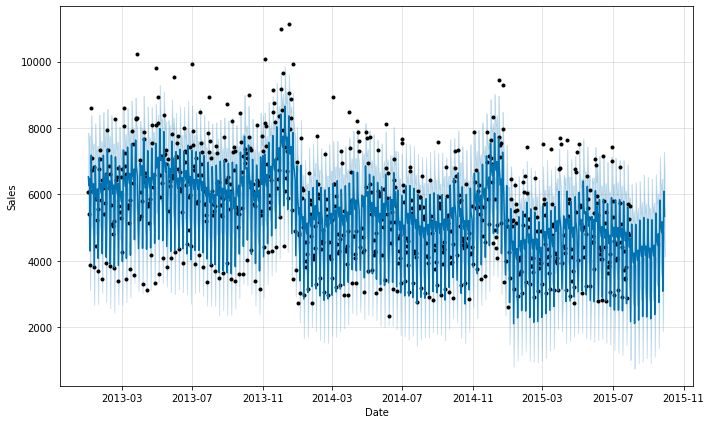

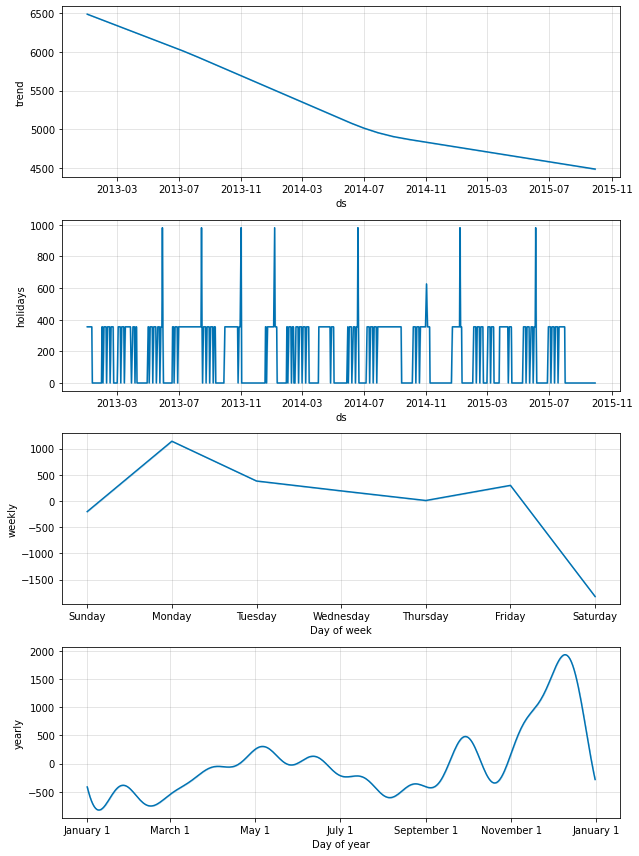

In [54]:
sales_predictions(6, sales_train_all, school_state_holidays, 60)